<b>Otazky:</b>
* Ako sa meni spotreba liekov podla rocneho obdobia?
* Ci zalezi na obdobii spotreba roznych druhov liek?

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%run tables.py

In [2]:
table2018 = import_table('all', 2018)
table_det2018 = import_table('detailed', 2018)
table2019 = import_table('all', 2019)
table_det2019 = import_table('detailed', 2019)
table_det2020 = import_table('detailed', 2020)

<h2>Analyza spotreby liekov skupin ATC1 podľa ročného obdobia</h2>

Adding medicine cathegory and merging tables with data in seasons in 2018-2020:

In [3]:
def process_tables(t, t_det, year, group, exp=None):
    tables = {}
    det_temp = t_det[[group, 'LIEK_KOD']].rename(columns={'LIEK_KOD':'KOD_PRODUKT'})
    t_temp = dict()
    for i in range(1, len(t.keys())):
        col = t[f'Q{i}'].columns
        t_temp[f'Q{i}'] = t[f'Q{i}'][[col[1], col[3]]].rename(columns={col[3]:f'POCET_BALENI_{year}Q{i}', col[1]:'KOD_PRODUKT'})
        temp = pd.merge(t_temp[f'Q{i}'], det_temp, on='KOD_PRODUKT').drop_duplicates()
        del temp['KOD_PRODUKT']
        tables[f'Q{i}'] = temp.groupby(group).sum()
    return tables

t18 = process_tables(table2018, table_det2018, 2018, 'ATC1_popis')
t19 = process_tables(table2019, table_det2019, 2019, 'ATC1_popis')

In [4]:
t_det2020 = dict()
for i in range(1, 5):
    t_det2020[f'Q{i}'] = table_det2020[f'Q{i}'].rename(columns={'Počet balení':f'POCET_BALENI_2020Q{i}'}).groupby('ATC1_popis').sum()
    del t_det2020[f'Q{i}']['ROK SPRAC']

In [64]:
def merge_tables(t, group='ATC1_popis'):
    k = list(t.keys())
    table = t[k[0]]
    for i in range(1, len(k)):
        table = pd.merge(table, t[k[i]], on=group)
    return table

t18 = merge_tables(t18)
t19 = merge_tables(t19)
t20 = merge_tables({'Q1':t_det2020['Q1'], 'Q2':t_det2020['Q2'], 'Q3':t_det2020['Q3'], 'Q4':t_det2020['Q4']})
table = merge_tables({'2018':t18, '2019':t19, '2020':t20})

Sorting values by seasons:

In [65]:
for col in table.columns:
    table = table.rename(columns={col:col[-6:]})

table.rename(index={'Systémové hormonálne prípravky okrem pohlavných hormónov':'Hormonálne prípravky'}, inplace=True)
display(table)
table.sort_values(by='ATC1_popis', key=lambda x: x.str.len(), inplace=True, ascending=False)

,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4
ATC1_popis,,,,,,,,,,,,
Antiinfektíva na systémové použitie,2476895.025,1757435.255,1570344.278,2245018.968,2246115.911,1568650.179,1433555.490,1988992.454,1947404.041,931362.709,1204894.248,1437697.830
Antineoplastiká a Imunomodulátory,461340.277,438330.525,428534.954,478805.637,461271.558,412802.204,397285.622,450901.550,448228.843,385594.512,404354.823,431958.546
Antiparazitiká,56080.683,51372.767,57687.000,76554.540,77923.050,75388.790,73415.900,80820.250,82095.670,61883.800,67526.190,78377.950
Dermatologiká,1708041.454,1913727.025,1857986.518,1844006.742,1837964.458,1963207.233,1734127.861,1819008.549,1769484.548,1431166.128,1696045.768,1371470.563
Kardiovaskulárny systém,7507297.222,7786179.766,7246344.858,7788066.714,7397013.400,7626479.902,7306288.500,7764997.438,8009815.727,7001971.534,7422832.698,7682148.992
Krv a krvotvorné orgány,4039917.298,3953947.259,3391985.097,3759972.145,3779341.040,3509232.036,3417353.738,2969987.914,2618329.683,2394135.510,2514305.061,2641380.826
Muskuloskeletárny systém,2746265.301,2742399.726,2590191.577,2975226.077,2700748.738,2592516.380,2574081.507,3005263.339,2962581.346,2263173.995,2518363.106,2527246.050
Nervový systém,6847404.783,5998371.264,5805994.442,6966968.471,6671317.099,5901644.373,5844317.375,6872347.281,8128045.502,5420003.556,5870798.529,6852240.149
Respiračný systém,5421766.451,3851904.932,3219928.572,5222035.962,5264506.956,3906522.433,3404381.233,5224729.153,5781477.060,2496297.472,3146290.318,3725496.271


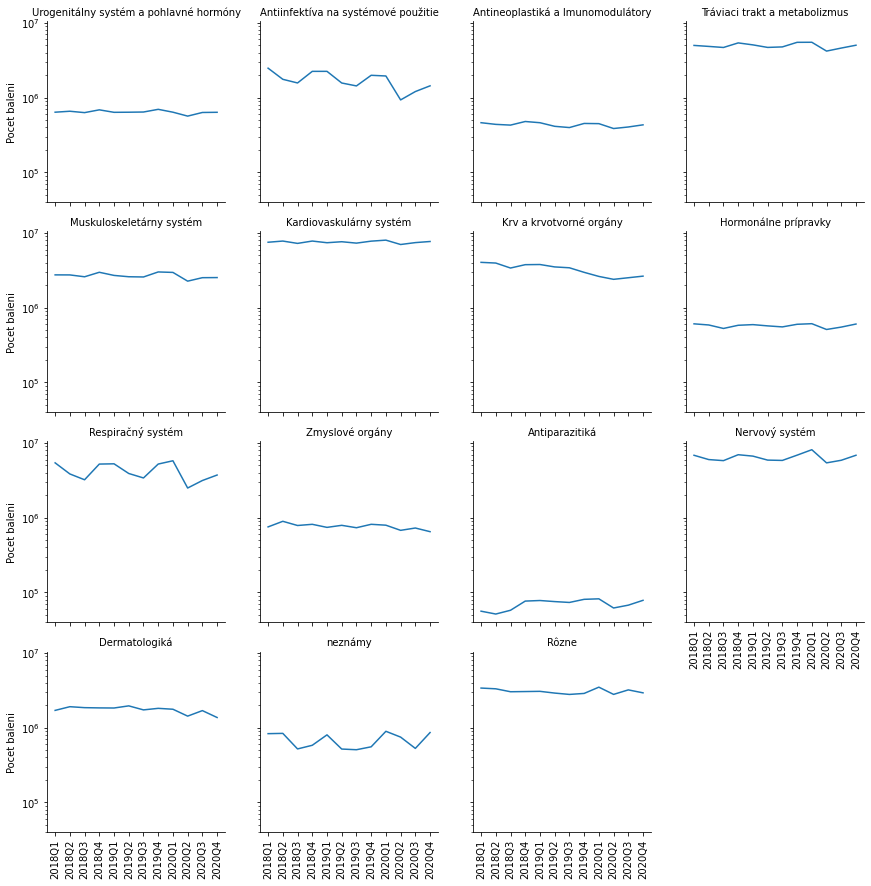

In [66]:
table_long = table.reset_index().melt(id_vars='ATC1_popis').rename(columns={'variable':'Obdobie', 'value':'Pocet baleni'})
grid = sns.relplot(data=table_long, x='Obdobie', y='Pocet baleni', col='ATC1_popis', col_wrap=4, kind="line", height=3, aspect=1)
grid.set(yscale="log").set_axis_labels('', 'Pocet baleni').set_xticklabels(rotation=90).set_titles(col_template="{col_name}", row_template="{row_name}")
display(grid)

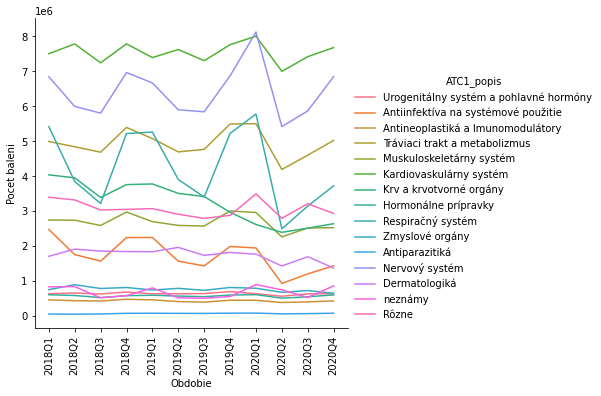

In [67]:
grid = sns.relplot(data=table_long, x='Obdobie', y='Pocet baleni', hue='ATC1_popis', kind='line')
grid.set_xticklabels(rotation=90).set_titles(col_template="{col_name}", row_template="{row_name}")
pass

Table shows how values change in respect of its maximum


,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4
ATC1_popis,,,,,,,,,,,,
Urogenitálny systém a pohlavné hormóny,0.915538,0.942707,0.903532,0.984412,0.912026,0.914859,0.920519,1.000000,0.915587,0.811533,0.907687,0.912719
Antiinfektíva na systémové použitie,1.000000,0.709532,0.633997,0.906384,0.906827,0.633313,0.578771,0.803018,0.786228,0.376020,0.486453,0.580444
Antineoplastiká a Imunomodulátory,0.963523,0.915467,0.895008,1.000000,0.963380,0.862150,0.829743,0.941721,0.936139,0.805326,0.844507,0.902158
Tráviaci trakt a metabolizmus,0.907265,0.879858,0.851615,0.980246,0.922513,0.853171,0.866454,0.997959,1.000000,0.761803,0.836330,0.912888
Muskuloskeletárny systém,0.913819,0.912532,0.861885,0.990005,0.898673,0.862659,0.856524,1.000000,0.985798,0.753070,0.837984,0.840940


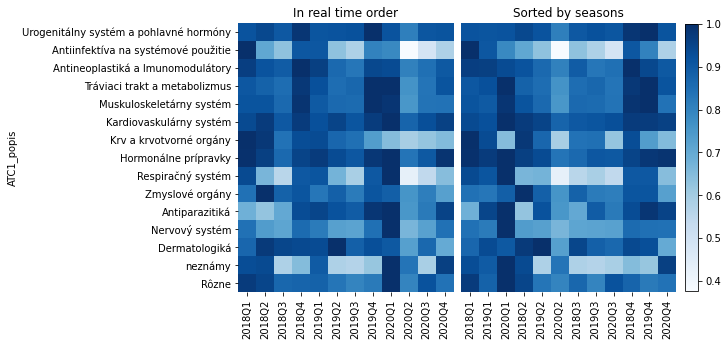

In [68]:
table_change = table.apply(lambda x: x/x.max(), axis=1)
table_s_change = table_change[['2018Q1', '2019Q1', '2020Q1', '2018Q2', '2019Q2', '2020Q2', '2018Q3', '2019Q3', '2020Q3', '2018Q4', '2019Q4', '2020Q4']]
print("Table shows how values change in respect of its maximum")
display(table_change.head())

color = 'Blues'

figure, axes = plt.subplots(1, 2, figsize=(10, 7), constrained_layout=True)
axes[0].set_title('In real time order')
sns.heatmap(data=table_change, square=True, ax=axes[0], cmap=color, cbar=False)
axes[1].set_title('Sorted by seasons')
sns.heatmap(data=table_s_change, square=True, ax=axes[1], cmap=color, yticklabels=False, cbar=False).set_ylabel('')
figure.colorbar(axes[1].collections[0], fraction=0.062, pad=0.04)
pass

Z heatmap vidíme, že: 
* “Neznáme lieky” boli viac predavané v 1. štvrťroku, treba sa pozrieť, aké lieky tam sú a čo by to mohlo znamenať
* “Antiparazitiká” stúpla na konci 2018 a ďalej sa nemenila silno
* “Krv a krvotvorné orgány” výrazne klesa od konca 2019
* V skupinách "Nervový systém", “Antiinfektíva na systémové použitie”, a "Respiračný systém" vidíme, že každý rok bolo predané viac balení liekov v 1. a 4. štvrťrokoch a posledné dve skupiny počas pandemie Covid-19 klesli viac ako v rokoch pred tým v tom istom obdobií

<h2>Analyza skupin ATC1 "Nervový systém", “Antiinfektíva na systémové použitie”,
    a "Respiračný systém" s rozdeleniem podľa ATC2 podľa ročného obdobia</h2>

In [69]:
t_18 = process_tables(table2018, table_det2018, 2018, 'ATC2_popis')
t_19 = process_tables(table2018, table_det2019, 2019, 'ATC2_popis')
t_20 = dict()
for i in range(1, 5):
    t_20[f'Q{i}'] = (table_det2020[f'Q{i}'].rename(columns={'Počet balení':f'POCET_BALENI_2020Q{i}'}).groupby('ATC2_popis').sum())
    del t_20[f'Q{i}']['ROK SPRAC']
t_18 = merge_tables(t_18, 'ATC2_popis')
t_19 = merge_tables(t_19, 'ATC2_popis')
t_20 = merge_tables({'Q1':t_20['Q1'], 'Q2':t_20['Q2'], 'Q3':t_20['Q3'], 'Q4':t_20['Q4']}, 'ATC2_popis')

In [83]:
table2 = merge_tables({'2018':t_18, '2019':t_19,'2020':t_20}, 'ATC2_popis')
for col in table2.columns:
    table2 = table2.rename(columns={col:col[-6:]})
display(table2.head())

,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4
ATC2_popis,,,,,,,,,,,,
Ace Inhibítory,1926399.590,1978206.798,1852825.458,2018555.139,1919867.689,1971403.700,1852023.188,2018341.709,2120585.412,1809412.465,1914834.872,2009933.351
Alergény,28010.750,15272.510,13345.713,29113.146,27897.750,15157.510,13337.713,29109.146,31052.383,17283.352,15199.835,33232.874
Analgetiká,3073740.843,2152705.408,2175534.873,3006389.602,3073329.063,2152552.538,2175428.373,3006319.272,4133509.619,1764402.230,2076565.249,2853469.414
Anestetiká,163930.633,163036.207,121365.427,143421.830,163654.633,162674.207,121131.427,143419.830,120573.207,93946.355,110323.540,120771.539
"Antacída, antiulceróza a antiflatulenciá",666499.489,655460.122,610569.141,685675.089,666371.489,655342.122,610478.141,685615.089,663649.083,578731.559,604316.063,669294.707


In [84]:
nervovy = table_det2019.drop_duplicates(subset=['ATC2_popis']).query('ATC1_popis == "Nervový systém"')['ATC2_popis'].tolist()
antiinfektiva = table_det2019.drop_duplicates(subset=['ATC2_popis']).query('ATC1_popis == "Antiinfektíva na systémové použitie"')['ATC2_popis'].tolist()
respiracny = table_det2019.drop_duplicates(subset=['ATC2_popis']).query('ATC1_popis == "Respiračný systém"')['ATC2_popis'].tolist()
table2 = table2.loc[nervovy + antiinfektiva + respiracny]
display(table2.index.tolist())

['Anestetiká',
 'Analgetiká',
 'Antiepileptiká',
 'Antiparkinsoniká',
 'Psycholeptiká',
 'Psychoanaleptiká',
 'Iné  lieky na nervový systém vrátane parasympatomimetík',
 'Antibakteriálne látky na systémové použitie',
 'Antimykotiká na systémové použitie',
 'Antituberkulotiká a\xa0Antileprotiká okrem Streptomycínu',
 'Antivirotiká na systémové použitie',
 'Séra a Imunoglobulíny',
 'Vakcíny',
 'Rinologiká',
 'Laryngologiká',
 'Antiastmatiká',
 'Expektoranciá, Mukolytiká a\xa0Antitusiká',
 'Antihistaminiká na systémové použitie',
 'Iné lieky respiračného systému']

In [85]:
table2.sort_values(by='ATC2_popis', key=lambda x: x.str.len(), inplace=True, ascending=False)
table2_change = table2.apply(lambda x: x/x.max(), axis=1)
table2_change['Min'] = table2_change.min(axis=1)
table2_change.query('Min < 0.8', inplace=True)
del table2_change['Min']
table2_s_change = table2_change[['2018Q1', '2019Q1', '2020Q1', '2018Q2', '2019Q2', '2020Q2', '2018Q3', '2019Q3', '2020Q3', '2018Q4', '2019Q4', '2020Q4']]
print('Table with groups that had change more than 20%')
display(table2_change.head())

Table with groups that had change more than 20%


,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4
ATC2_popis,,,,,,,,,,,,
Antituberkulotiká a Antileprotiká okrem Streptomycínu,0.950664,1.000000,0.923373,0.955820,0.950664,1.000000,0.923373,0.955820,0.947976,0.777100,0.821534,0.732183
Antibakteriálne látky na systémové použitie,1.000000,0.676934,0.595235,0.826256,0.999560,0.676762,0.595190,0.826214,0.767628,0.337103,0.426460,0.497571
"Expektoranciá, Mukolytiká a Antitusiká",0.996821,0.444963,0.365916,0.842370,1.000000,0.446241,0.367493,0.845701,0.972461,0.190821,0.304438,0.501671
Antihistaminiká na systémové použitie,0.859953,1.000000,0.752953,0.799128,0.856904,0.999104,0.752861,0.799111,0.907690,0.738319,0.743133,0.640753
Antivirotiká na systémové použitie,0.675831,0.584591,0.544240,0.671061,0.674438,0.583447,0.543794,0.670903,0.855334,0.520886,0.577560,1.000000


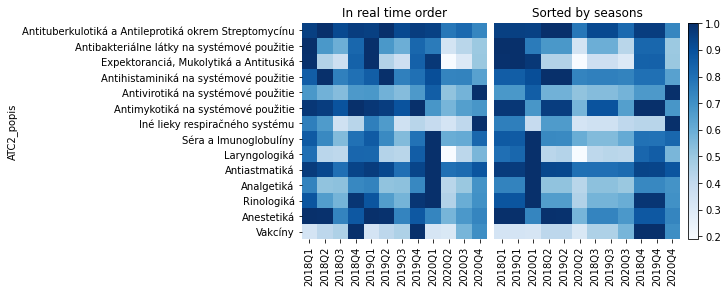

In [87]:
figure, axes = plt.subplots(1, 2, figsize=(10, 9), constrained_layout=True)
axes[0].set_title('In real time order')
sns.heatmap(data=table2_change, square=True, ax=axes[0], cmap=color, cbar=False)
axes[1].set_title('Sorted by seasons')
sns.heatmap(data=table2_s_change, square=True, ax=axes[1], cmap=color, yticklabels=False, cbar=False).set_ylabel('')
figure.colorbar(axes[1].collections[0], fraction=0.058, pad=0.04, ax=axes[1])
pass

Z heatmapov vidíme:
* skupiny, ktoré mali väčšiu spotrebu v 1. a 4. štvrťrokoch:
    * "Analgetiká", 
    * "Antibakteriálne látky na systémové použitie", 
    * "Antivirotiká na systémové použitie", 
    * "Séra a Imunoglobulíny", 
    * "Rinologiká", 
    * "Laryngologiká", 
    * "Antiastmatiká", 
    * "Expektoranciá, Mukolytiká a Antitusiká"
* skupina "Vakcíny" bola oveľa viac predavana v 4. štvrťroku
* "Iné lieky respiračného systému" boli viac spotrebované v 1. štvrťroku 

<h2>Nezname lieky</h2>

In [257]:
nezname = table_det2019.query('ATC1_popis == "neznámy"')['LIEK_KOD'].to_list()

nezname2018 = dict()
for i in range(1, 5):
    nezname2018[f'Q{i}'] = table2018[f'Q{i}'].query('KOD_PRODUKT in @nezname').rename(columns={f'POCET_BALENI_Q{i}':f'2018Q{i}', 'KOD_PRODUKT_POP':'LIEK_popis'})[['LIEK_popis', f'2018Q{i}']]

nezname2019 = dict()
for i in range(1, 5):
    nezname2019[f'Q{i}'] = table2019[f'Q{i}'].query('LIEK_KOD in @nezname').rename(columns={f'Počet balení_Q{i}':f'2019Q{i}'})[['LIEK_popis', f'2019Q{i}']]    

nezname2020 = dict()
for i in [1, 2, 3]:
    nezname2020[f'Q{i}'] = table_det2020[f'Q{i}'].query('ATC1_popis == "neznámy"').rename(columns={'Počet balení':f'2020Q{i}'})[['LIEK_popis', f'2020Q{i}']]

nezname2018 = merge_tables(nezname2018, 'LIEK_popis').dropna().groupby('LIEK_popis').sum()
nezname2019 = merge_tables(nezname2019, 'LIEK_popis').dropna().groupby('LIEK_popis').sum()
nezname2020 = merge_tables(nezname2020, 'LIEK_popis').dropna().groupby('LIEK_popis').sum()
nezname = merge_tables({'1':nezname2018, '2':nezname2019, '3':nezname2020}, 'LIEK_popis')
display(nezname.shape)
display(nezname.head(10))

(67, 11)

,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3
LIEK_popis,,,,,,,,,,,
123I-IBZM,1.00,3.00,3.00,4.00,2.000,1.000,3.000,1.000,5.00,1.0,1.0
ADREVIEW - 185 MBQ,12.00,10.00,10.00,12.00,8.000,8.000,7.000,8.000,14.00,4.0,8.0
"ADREVIEW 74MBQ/ML 92,5MBQ",12.00,10.00,7.00,6.00,4.000,7.000,4.000,3.000,5.00,4.0,2.0
AT 10 Lösung gtt por 3x30 ml,22.00,41.00,47.00,39.00,50.000,15.000,10.000,40.000,40.00,30.0,38.0
AT 10 Lösung gtt por 3x30ml,102.00,124.00,139.00,116.00,109.000,52.000,51.000,132.000,111.00,96.0,99.0
"Bricanyl inj 0,5mg/ml 10 amp",34.00,2.00,1.00,2.00,1.000,4.000,3.000,2.000,2.50,1.5,3.0
Canephron tbl obd 60(3x20) (blis.PVC/PVDC-Al),5929.82,6011.01,6238.33,8049.99,7021.343,7006.657,6891.967,8302.675,171458.55,133059.8,150366.8
Celá krv - vyšetrená,13.00,4.00,9.00,5.00,68.000,80.000,52.000,32.000,5.00,1.0,1.0
Cisplatin Accord 1mg/1ml con inf 10ml/10mg,117.00,790.00,698.00,593.00,184.000,259.000,468.000,428.000,396.00,176.0,1788.0
